<a href="https://colab.research.google.com/github/abhay130104/BharatInternTask2/blob/main/DigitRecognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognization on MNIST Dataset

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
#check if GPU is available
print("GPU", "Yes Available" if tf.config.list_physical_devices("GPU") else "Not Available")

GPU Yes Available


## Getting our data ready

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
len(X_train), len(X_test)

(60000, 10000)

In [ ]:
len(y_train), len(y_test)

(60000, 10000)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
y_train.shape

(60000,)

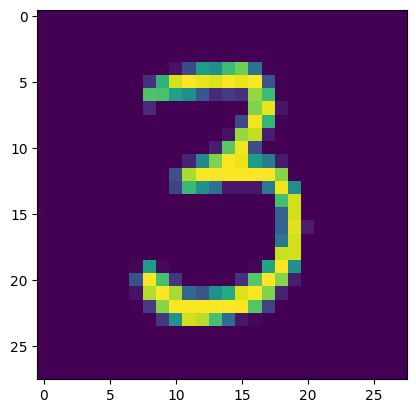

3


In [ ]:
#getting an image and it's corresponding label
plt.imshow(X_train[50])
plt.show();
print(y_train[50])

In [ ]:
y_train_plot = pd.DataFrame(y_train)
y_train_plot[0]

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: 0, Length: 60000, dtype: uint8

In [ ]:
y_train_plot[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

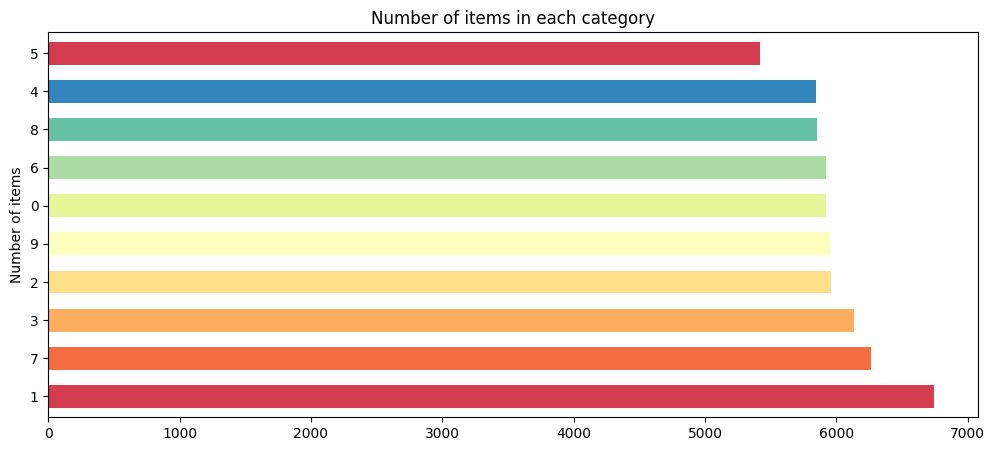

In [ ]:
result=y_train_plot[0].value_counts().sort_values(ascending=False)
result.plot.barh(color=sns.color_palette("Spectral", 9),width = 0.6, figsize=(12,5))
plt.title("Number of items in each category")
plt.ylabel('Number of items')
plt.show()

#### As all the images are of the same size in the dataset we don't need to resize them.

# Data Preprocessing

In [ ]:
#Scaling the images for making it easy for our deep learning model

X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[50]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Building the Neural Network

In [ ]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])

In [ ]:
# Compling the model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Training the neural network

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.2977 - accuracy: 0.9131
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1372 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1006 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0815 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0567 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0494 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9864
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0376 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03

### Accuracy on Test data

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Data Accuracy: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9742
Testing Data Accuracy:  0.9742000102996826


In [ ]:
# Getting the prediction labels
y_preds = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_preds.shape

(10000, 10)

In [ ]:
y_preds[0]

array([1.5037075e-03, 4.0061184e-04, 8.9386731e-01, 8.8779378e-01,
       1.2955590e-05, 1.0482870e-03, 2.7636480e-12, 9.9999881e-01,
       2.5950953e-01, 1.4999941e-01], dtype=float32)

In [ ]:
# Converting the prediciton probabilities to class label
y_preds_labels = [np.argmax(i) for i in y_preds]
print(y_preds_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# Printing the confusion matrix

cm = confusion_matrix(y_preds_labels, y_test)
cm

array([[ 963,    0,    2,    2,    0,    2,    2,    2,    1,    1],
       [   0, 1125,    0,    0,    0,    2,    4,    3,    0,    5],
       [   2,    4, 1013,    5,    4,    1,    2,   17,    6,    0],
       [   0,    0,    3,  986,    0,   17,    1,    2,    4,    6],
       [   0,    0,    1,    0,  957,    2,    5,    3,    3,    7],
       [   3,    0,    1,    2,    1,  849,    3,    0,    4,    8],
       [   8,    1,    5,    0,    8,    7,  940,    0,    1,    1],
       [   2,    0,    3,    3,    2,    1,    0,  992,    3,    3],
       [   1,    5,    4,    9,    2,    9,    1,    2,  950,   11],
       [   1,    0,    0,    3,    8,    2,    0,    7,    2,  967]])

## Confusion Matrix

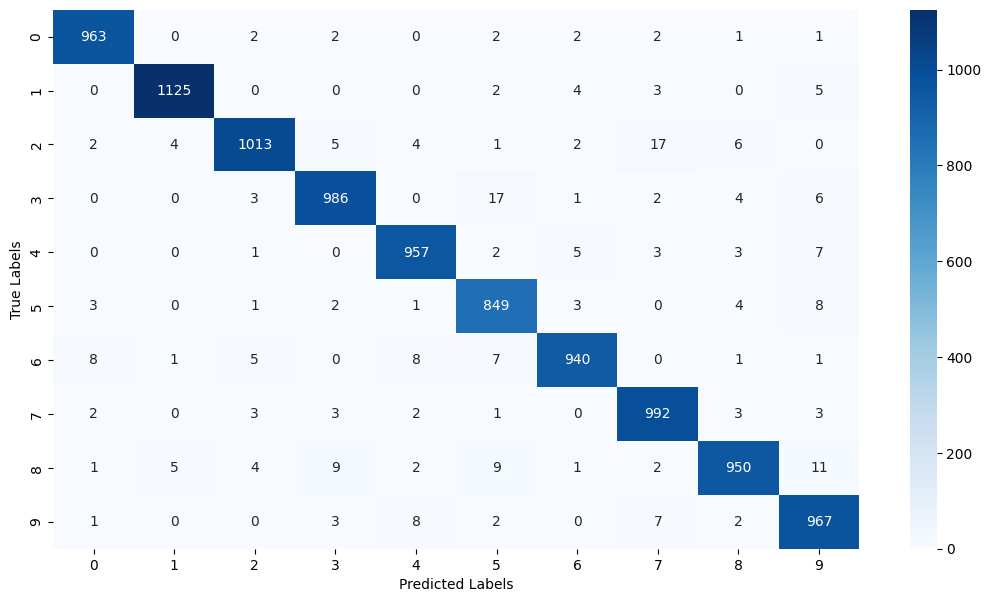

In [ ]:
plt.figure(figsize = (13,7))
sns.heatmap(cm, annot=True, fmt ='d', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show();

### Make function to visualize better

In [ ]:
#Function to plot the prediction along with accuracy

def plot_pred(y_preds, y_true, image, n = 1):

  pred_prob, true_label, image = y_preds[n], y_true[n], image[n]

  pred_label = np.argmax(pred_prob);

  #Give color to predcited and true
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  #Plot images and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color = color)

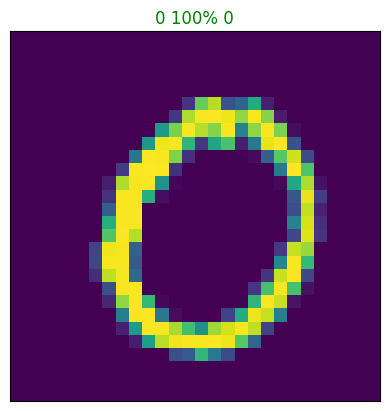

In [ ]:
plot_pred(y_preds, y_test, X_test, n=101)

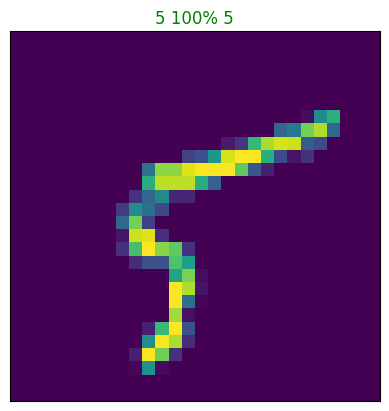

In [ ]:
plot_pred(y_preds, y_test, X_test, n=59)

### Testing the model on custom images

Path of the image to be predicted/content/drive/MyDrive/CustomImage/image5.png


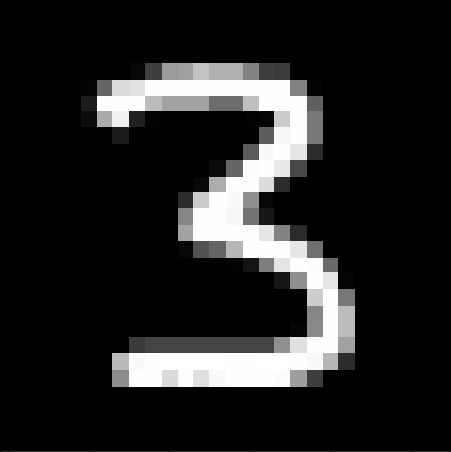

1/1 [==============================] - 0s 20ms/step
Input image is recognized as:  3


In [ ]:
# Section for testing on a custom image

input_imagepath = input("Path of the image to be predicted")
input_image = cv2.imread(input_imagepath)
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print("Input image is recognized as: ", input_pred_label)